In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display plots inline
%matplotlib inline

df = pd.read_csv('../../data/togo-dapaong_qc.csv', parse_dates=['Timestamp']) 
df.head() 


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:

display(df.describe().T)

# Missing-value report
missing = df.isna().sum()
pct_missing = (missing / len(df)) * 100
pd.DataFrame({'missing_count': missing, 'pct_missing': pct_missing}).query('pct_missing > 0')


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565


,missing_count,pct_missing
Comments,525600,100.0


In [4]:
from scipy.stats import zscore

cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
zs = df[cols].apply(zscore, nan_policy='omit')
outliers = (zs.abs() > 3)

# Flag rows with any outlier
df['outlier_flag'] = outliers.any(axis=1)

# How many outliers?
df['outlier_flag'].sum(), len(df)

# Drop or impute
# e.g., median imputation
for c in cols:
    median = df.loc[~outliers[c], c].median()
    df.loc[df[c].isna() | outliers[c], c] = median


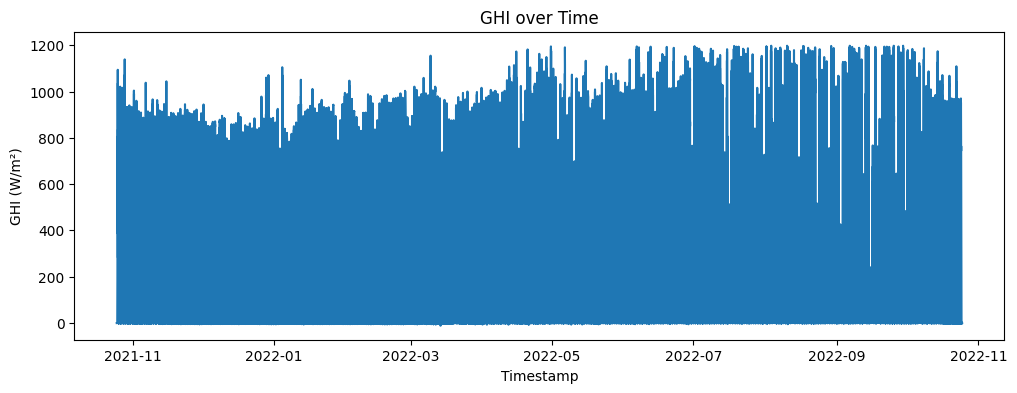

C:\Users\USER\AppData\Local\Temp\ipykernel_16224\1233816945.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Timestamp')['GHI'].resample('M').mean()


Text(0.5, 1.0, 'Average Monthly GHI')

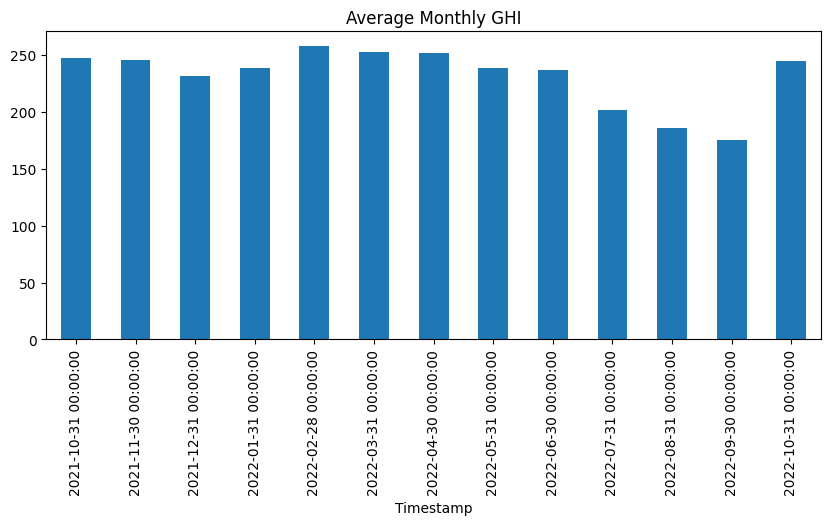

In [5]:
# Plot global irradiance over time
plt.figure(figsize=(12,4))
plt.plot(df['Timestamp'], df['GHI'])
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# You can also resample by month:
monthly = df.set_index('Timestamp')['GHI'].resample('M').mean()
monthly.plot(kind='bar', figsize=(10,4))
plt.title('Average Monthly GHI')


Text(0.5, 1.0, 'Cleaning Impact')

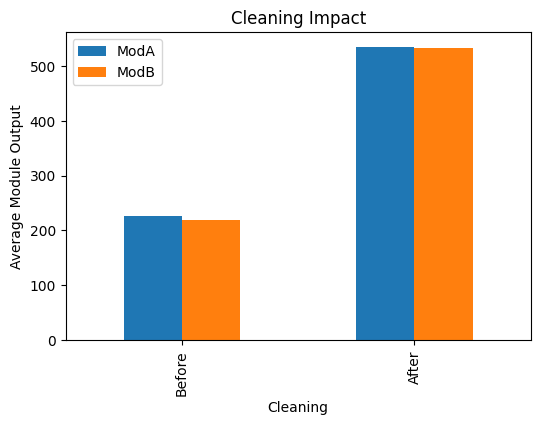

In [6]:
# Compare module readings pre/post cleaning
grouped = df.groupby('Cleaning')[['ModA','ModB']].mean().reset_index()
grouped.plot(x='Cleaning', kind='bar', figsize=(6,4))
plt.xticks([0,1], ['Before','After'])
plt.ylabel('Average Module Output')
plt.title('Cleaning Impact')


Text(0.5, 1.0, 'WS vs GHI')

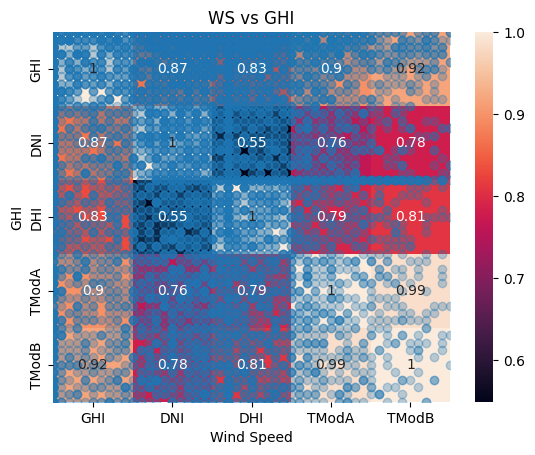

In [7]:
# Heatmap
corr = df[['GHI','DNI','DHI','TModA','TModB']].corr()
sns.heatmap(corr, annot=True)

# Scatter examples
plt.scatter(df['WS'], df['GHI'], alpha=0.3)
plt.xlabel('Wind Speed'); plt.ylabel('GHI')
plt.title('WS vs GHI')


Text(0.5, 1.0, 'GHI Distribution')

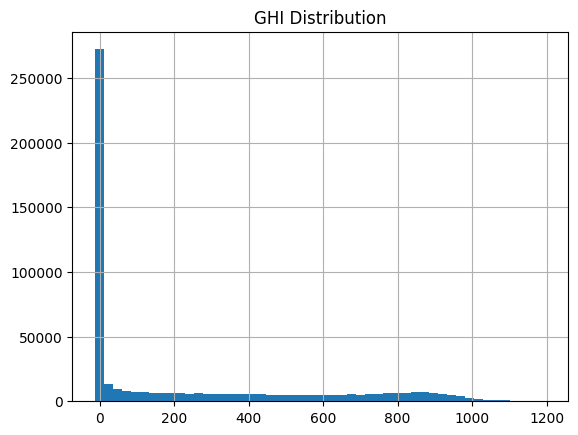

In [8]:
# Histogram of GHI
df['GHI'].hist(bins=50)
plt.title('GHI Distribution')

# Wind rose (via windrose library if you install it)
# from windrose import WindroseAxes
# ax = WindroseAxes.from_ax()
# ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()


Text(0.5, 1.0, 'Relative Humidity vs Ambient Temp')

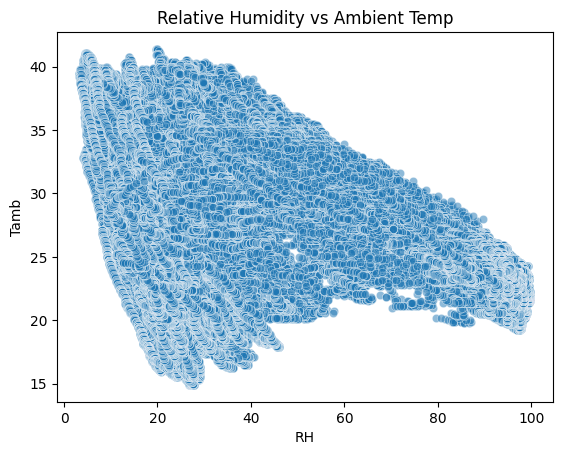

In [9]:
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title('Relative Humidity vs Ambient Temp')


Text(0.5, 1.0, 'GHI vs Tamb (bubble = RH)')

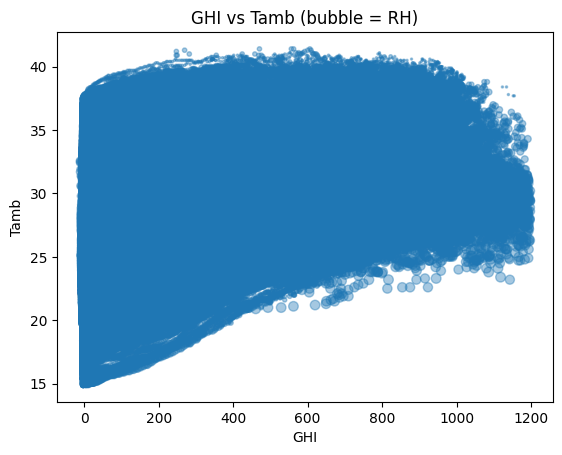

In [10]:
plt.scatter(
    df['GHI'], df['Tamb'],
    s=df['RH'] * 0.5,  # scale bubble by RH
    alpha=0.4
)
plt.xlabel('GHI'); plt.ylabel('Tamb')
plt.title('GHI vs Tamb (bubble = RH)')


In [12]:
df.to_csv('../../data/togo_clean.csv', index=False)
